This is an [jupyter](http://jupyter.org) notebook.
Lectures about Python, useful both for beginners and experts, can be found at http://scipy-lectures.github.io.

Open the notebook by (1) copying this file into a directory, (2) in that directory typing 
jupyter-notebook
and (3) selecting the notebook.

***
Written By: **Riddhish Bhalodia**
***

In this exercise, we will learn about a method called Expectation Maximization(EM) and apply it to segment human brain images. Unlike previous notebooks this is one with pre-requisite, one must have strong probablistic background and have idea about maximum likliehood estimation and little bit of machine learning.

# Expectation Maximization
## Motivation

Expectation maximization or more commonly abbereviated as EM is not an algorithm but rather a philosophy or a way to arrive at an algorithm. We first import the necessary modules.


In [1]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


We now read the image, It's a Brian MRI scan and it's mask, our task is to segment the brain into three prominant regions, white 

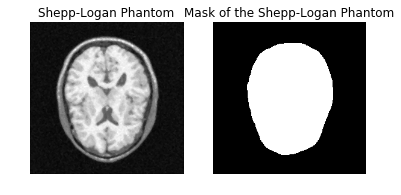

In [2]:
# import the shepp logan phantom
input_phantom = plt.imread('c.png')
phantom_mask = plt.imread('mask_file.png')
fig, ax = plt.subplots(1,2)
ax[0].imshow(input_phantom, cmap = 'gray', origin = 'lower')
ax[0].set_title('Shepp-Logan Phantom')
ax[0].set_axis_off()
ax[1].imshow(phantom_mask, cmap = 'gray', origin = 'lower')
ax[1].set_title('Mask of the Shepp-Logan Phantom')
ax[1].set_axis_off()


In [3]:
print(input_phantom.shape)



(256, 256)


In [4]:
# Now we will segment this image, as we can see there are four different grayscale intensities
K = 4 # number of clusters
X = input_phantom[phantom_mask == 1]
m = len(X)


In [5]:
# Initialization Part
indices = np.random.permutation(m)
mu = np.zeros(K)
for i in range(K):
    mu[i] = X[indices[i]]
    
sigma = np.ones(K) * np.sqrt(np.var(X));
phi = np.ones(K) * (1.0 / np.double(K));


In [6]:
# Matrix to hold the probability that each data point belongs to each cluster.
# One row per data point, one column per cluster.
W = np.zeros((m, K))
l = np.array([phi, ] * m,dtype=np.float64)



In [9]:
# Expectation maximization

for i in range(1000):
    print('EM iteration', i)
    prevmu = np.zeros(K)
    # E- Step (Expectation)
    pdf = np.zeros((m, K))
    
    # for each cluster evaluate the gaussian points
    for j in range(K):
        pdf[:,j] = (1 / (sigma[j] * np.sqrt(2 * np.pi))) * np.exp(-(X - mu[j])**2 / (2 * sigma[j]**2))
    
    pdf_w = pdf * l
    sm = np.array([np.sum(pdf_w, axis = 1), ] * K, dtype=np.float64).transpose()
    W = pdf_w / sm
    
    # M- Step (Maximization)
    prevmu = np.copy(mu)
    for j in range(K):
        
        # prior probability of the cluster j
        phi[j] = np.mean(W[:, j])
        
        # now compute the weighted average
        mu[j] = np.sum(W[:,j] * X)
        mu[j] = mu[j] / np.sum(W[:,j])
        
        # similarly the sigma
        sigma[j] = np.sum(W[:,j] * (X - mu[j])**2)
        sigma[j] = sigma[j] / np.sum(W[:, j])
        sigma[j] = np.sqrt(sigma[j])
    
    if np.sum(abs(mu  - prevmu)) < 0.001:
        break
    

('EM iteration', 0)
('EM iteration', 1)
('EM iteration', 2)
('EM iteration', 3)
('EM iteration', 4)
('EM iteration', 5)
('EM iteration', 6)
('EM iteration', 7)
('EM iteration', 8)
('EM iteration', 9)
('EM iteration', 10)
('EM iteration', 11)
('EM iteration', 12)
('EM iteration', 13)
('EM iteration', 14)
('EM iteration', 15)
('EM iteration', 16)
('EM iteration', 17)
('EM iteration', 18)
('EM iteration', 19)
('EM iteration', 20)
('EM iteration', 21)
('EM iteration', 22)
('EM iteration', 23)
('EM iteration', 24)
('EM iteration', 25)
('EM iteration', 26)
('EM iteration', 27)


In [10]:
out = np.zeros((input_phantom.shape[0], input_phantom.shape[1], 3))
temp = input_phantom
temp[phantom_mask == 1] = W[:,0]
out[:,:,0] = np.reshape(temp, input_phantom.shape);
temp = input_phantom
temp[phantom_mask == 1] = W[:,1]
out[:,:,1] = np.reshape(temp, input_phantom.shape);
temp = input_phantom
temp[phantom_mask == 1] = W[:,2]
out[:,:,2] = np.reshape(temp, input_phantom.shape);

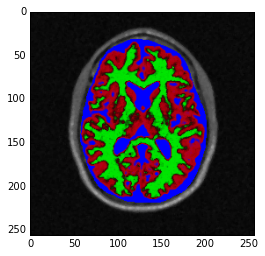

In [11]:
plt.imshow(out)